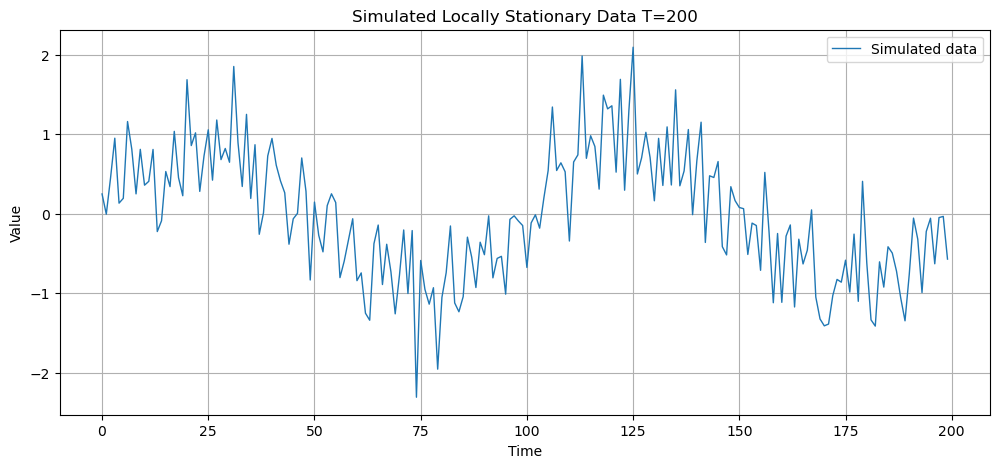

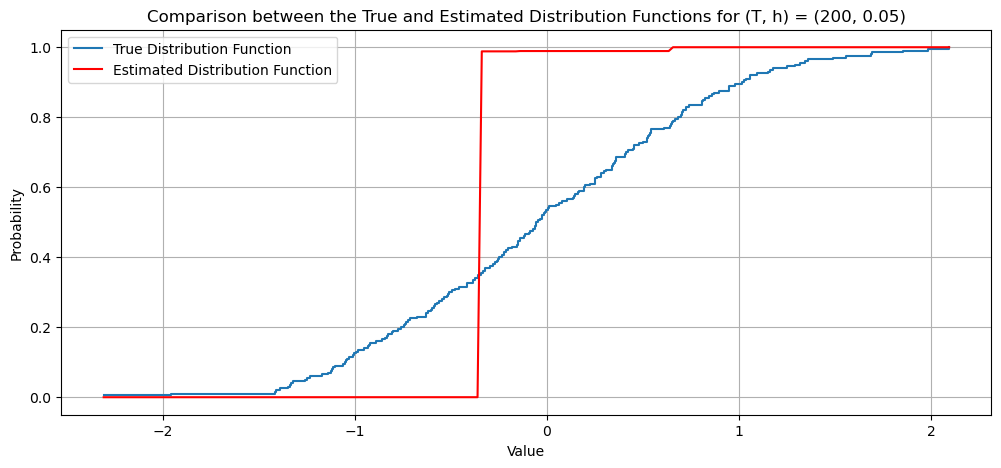

1-Wasserstein distance:  0.25024570376319505


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.05

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h1 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h1, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.05)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h1
dist2 = F_values_h1

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)


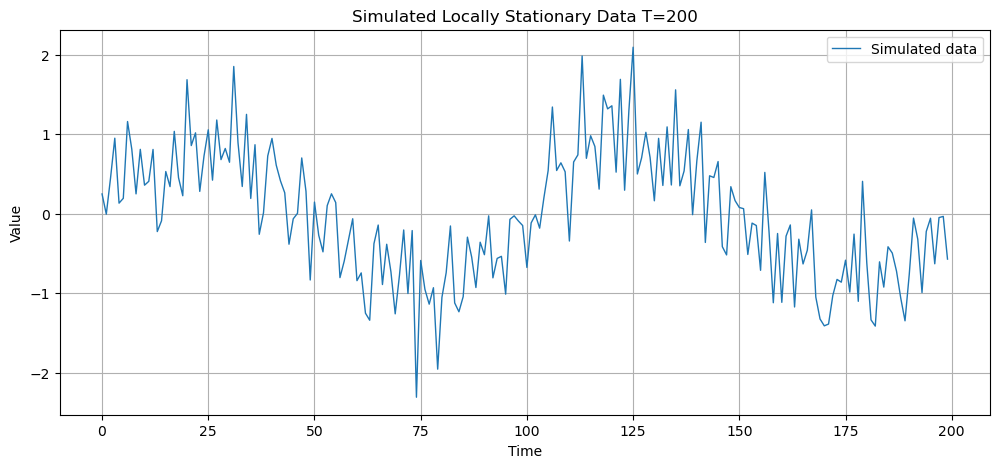

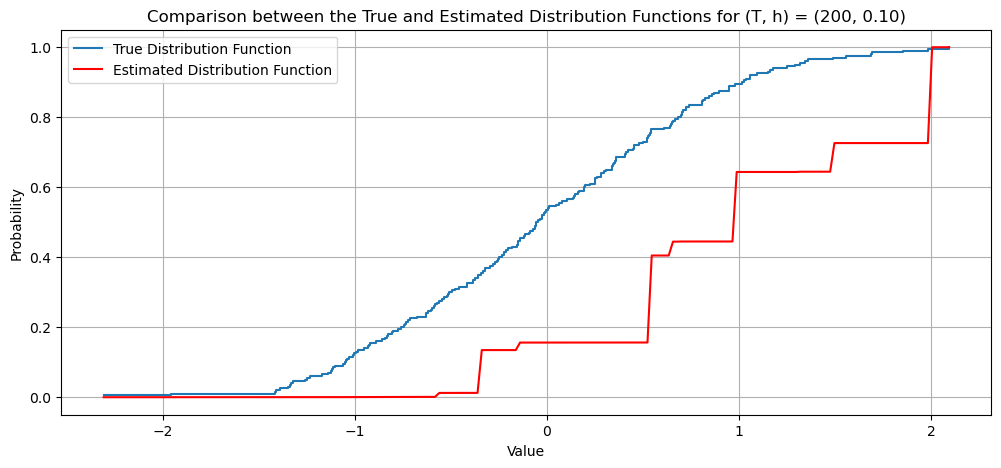

1-Wasserstein distance:  0.24593335504703195


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.1

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h2 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h2 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h2, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h2, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.10)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h2
dist2 = F_values_h2

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)


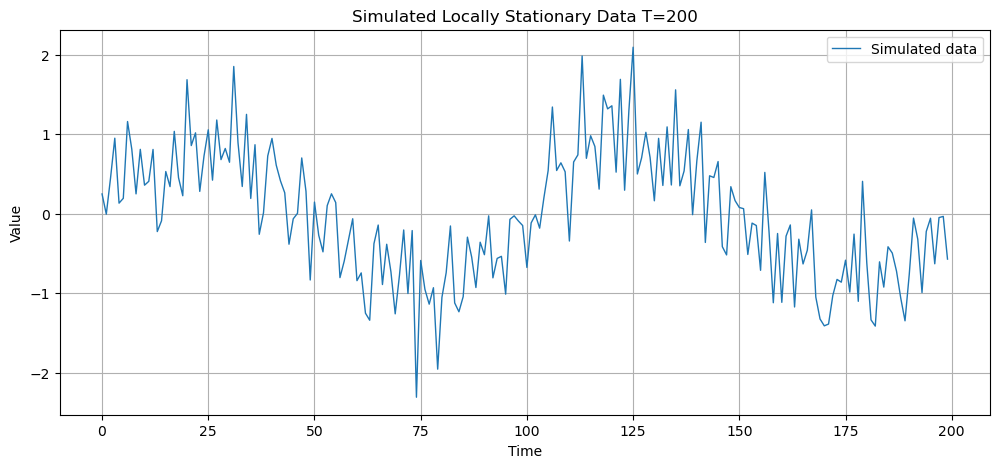

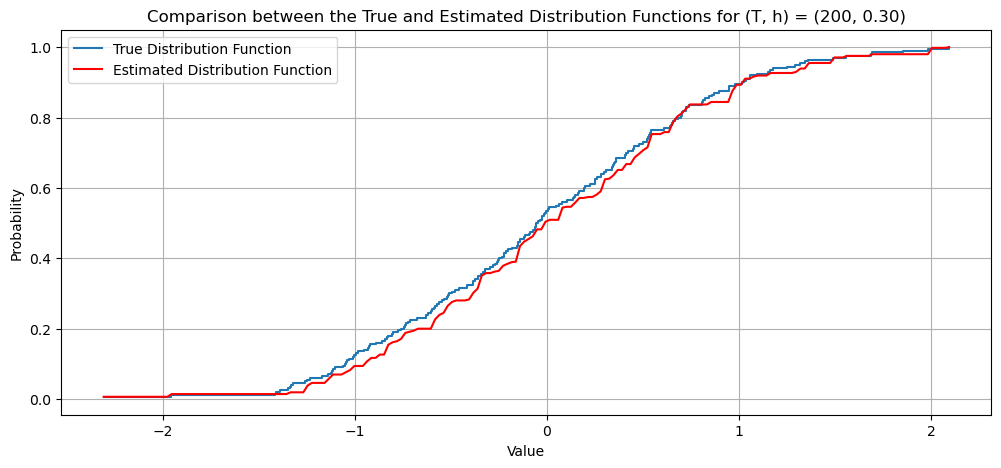

1-Wasserstein distance:  0.10660197458460204


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.3

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h3 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h3 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h3, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h3, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.30)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h3
dist2 = F_values_h3

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)


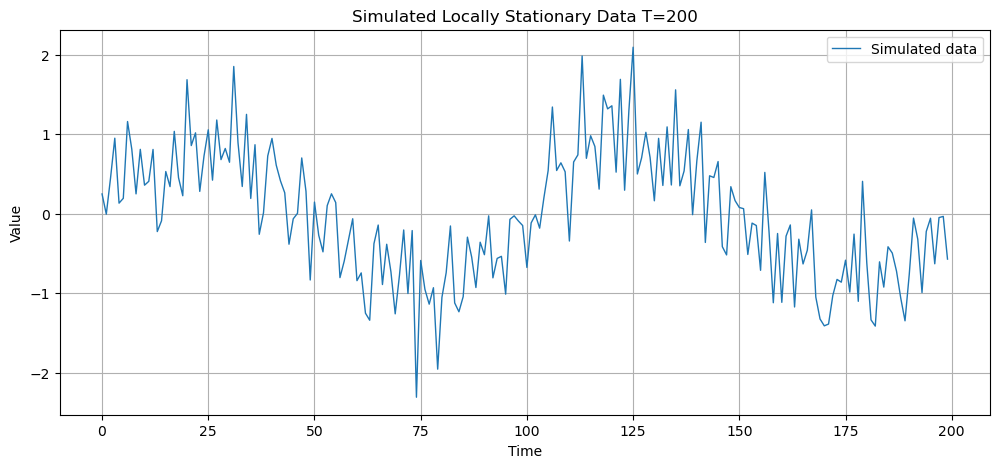

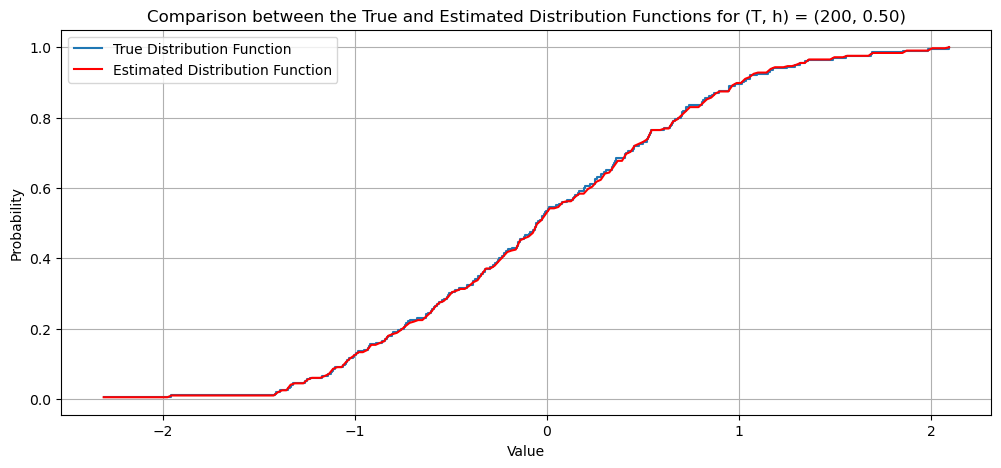

1-Wasserstein distance:  0.10407472876621915


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.5

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h4 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h4 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h4, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h4, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.50)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h4
dist2 = F_values_h4

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)


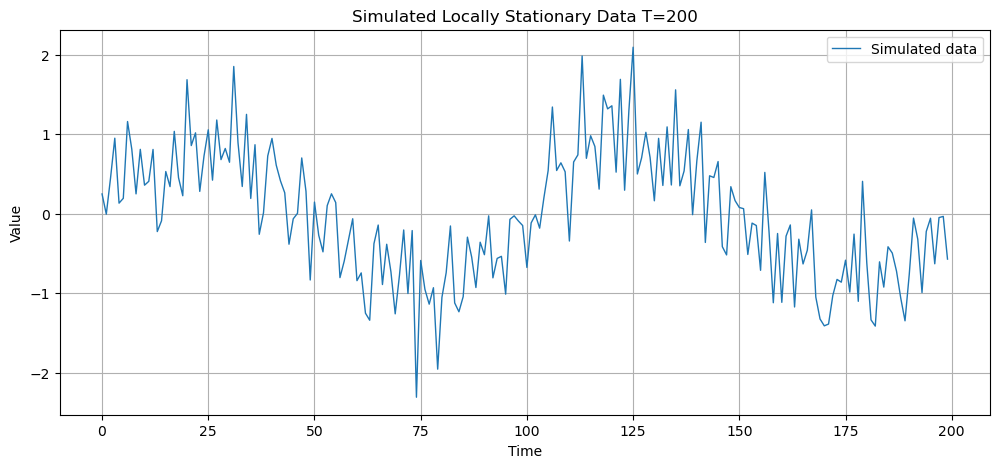

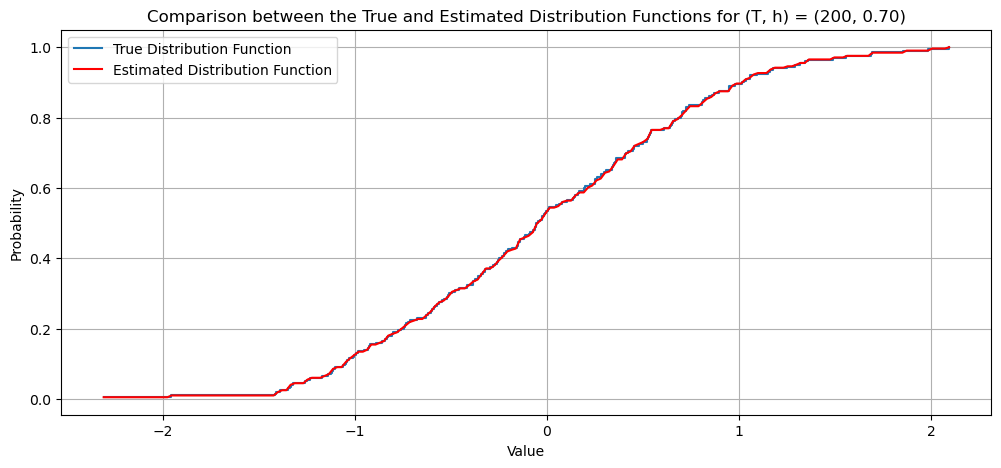

1-Wasserstein distance:  0.10388726620171561


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.7

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h5 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h5 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h5, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h5, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.70)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h5
dist2 = F_values_h5

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)


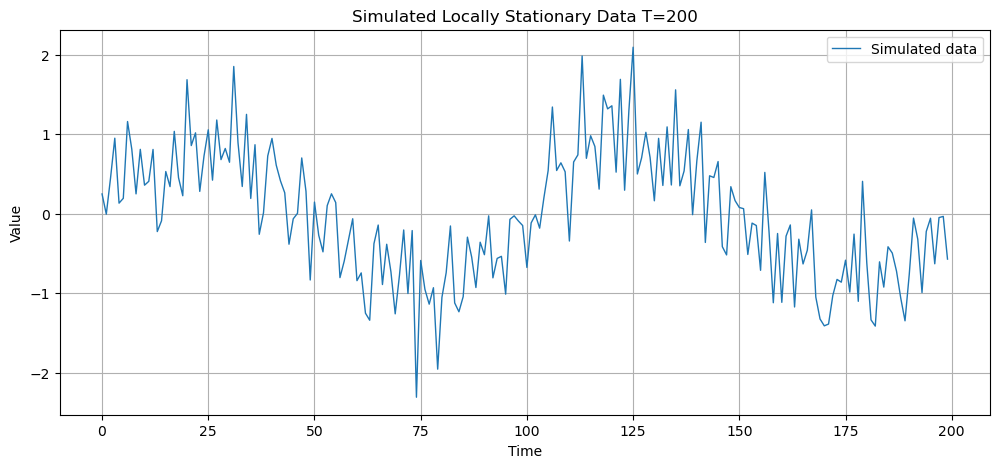

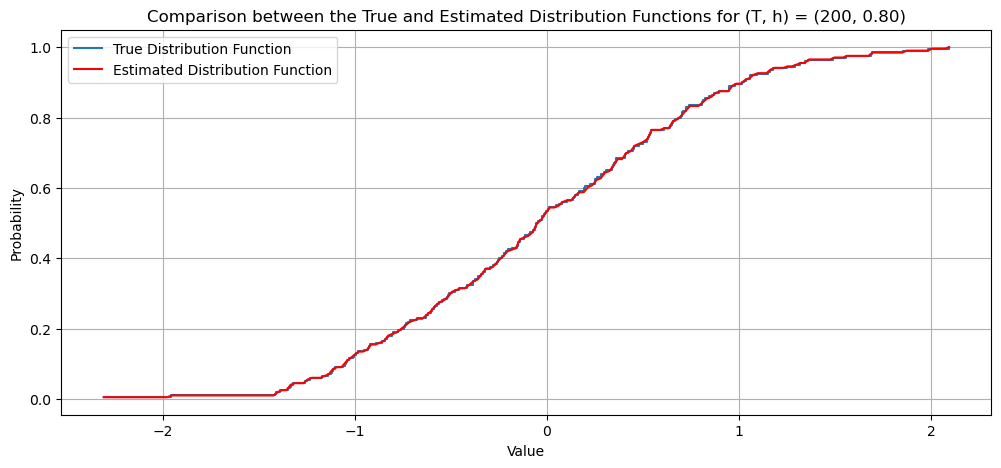

1-Wasserstein distance:  0.10385678536184528


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define uniform kernels
def K_h1(z, h):
    return 0.5 if abs(z/h) <= 1 else 0

# Define Gaussian kernels
def K_h2(z, h):
    return np.exp(-z**2 / (2 * h**2))

#Example

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.8

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values_h6 = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF_h6 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h6, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h6, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for (T, h) = (200, 0.80)")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF_h6
dist2 = F_values_h6

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
print("1-Wasserstein distance: ", W1)

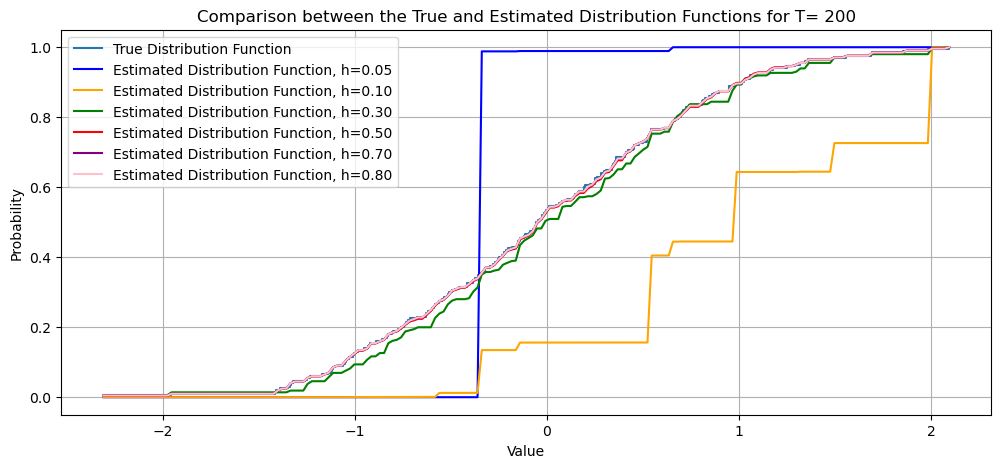

In [9]:
#Summary plot of the estimated distribution functions varying c1 and c2
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF_h1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values_h1, label="Estimated Distribution Function, h=0.05", color='blue')
plt.plot(v_values, F_values_h2, label="Estimated Distribution Function, h=0.10", color='orange')
plt.plot(v_values, F_values_h3, label="Estimated Distribution Function, h=0.30", color='green')
plt.plot(v_values, F_values_h4, label="Estimated Distribution Function, h=0.50", color='red')
plt.plot(v_values, F_values_h5, label="Estimated Distribution Function, h=0.70", color='purple')
plt.plot(v_values, F_values_h6, label="Estimated Distribution Function, h=0.80", color='pink')
plt.title("Comparison between the True and Estimated Distribution Functions for T= 200")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()